In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [41]:
#importing data
train = pd.read_csv('train_F3fUq2S.csv')

pd.set_option('display.max_columns', None)

train.head()

campaign_id  sender  subject_len  body_len  mean_paragraph_len  \
0            1       3           76     10439                  39   
1            2       3           54      2570                 256   
2            3       3           59     12801                  16   
3            4       3           74     11037                  30   
4            5       3           80     10011                  27   

   day_of_week  is_weekend times_of_day  category  product  no_of_CTA  \
0            5           1         Noon         6       26          3   
1            5           1      Morning         2       11          0   
2            5           1         Noon         2       11          3   
3            4           0      Evening        15        9          4   
4            5           1         Noon         6       26          3   

   mean_CTA_len  is_image  is_personalised  is_quote  is_timer  is_emoticons  \
0            29         0                0         0         0             0   
1            22         0                0         0         0             0   
2            23         1                0         1         0             0   
3            24         0                0         0         0             0   
4            31         0                0         1         0             0   

   is_discount  is_price  is_urgency  target_audience  click_rate  
0            0         0           0               14    0.103079  
1            0         0           0               10    0.700000  
2            0         0           0               16    0.002769  
3            0         0           0               10    0.010868  
4            0         0           0               14    0.142826

# Feature engineering

In [42]:
train['times_of_day'].value_counts()

train['times_of_day'] = train['times_of_day'].map({'Morning': 1,'Noon': '2', 'Evening': '3'})

train['times_of_day'] = train['times_of_day'].astype(int)

In [43]:
train.head()

campaign_id  sender  subject_len  body_len  mean_paragraph_len  \
0            1       3           76     10439                  39   
1            2       3           54      2570                 256   
2            3       3           59     12801                  16   
3            4       3           74     11037                  30   
4            5       3           80     10011                  27   

   day_of_week  is_weekend  times_of_day  category  product  no_of_CTA  \
0            5           1             2         6       26          3   
1            5           1             1         2       11          0   
2            5           1             2         2       11          3   
3            4           0             3        15        9          4   
4            5           1             2         6       26          3   

   mean_CTA_len  is_image  is_personalised  is_quote  is_timer  is_emoticons  \
0            29         0                0         0         0             0   
1            22         0                0         0         0             0   
2            23         1                0         1         0             0   
3            24         0                0         0         0             0   
4            31         0                0         1         0             0   

   is_discount  is_price  is_urgency  target_audience  click_rate  
0            0         0           0               14    0.103079  
1            0         0           0               10    0.700000  
2            0         0           0               16    0.002769  
3            0         0           0               10    0.010868  
4            0         0           0               14    0.142826

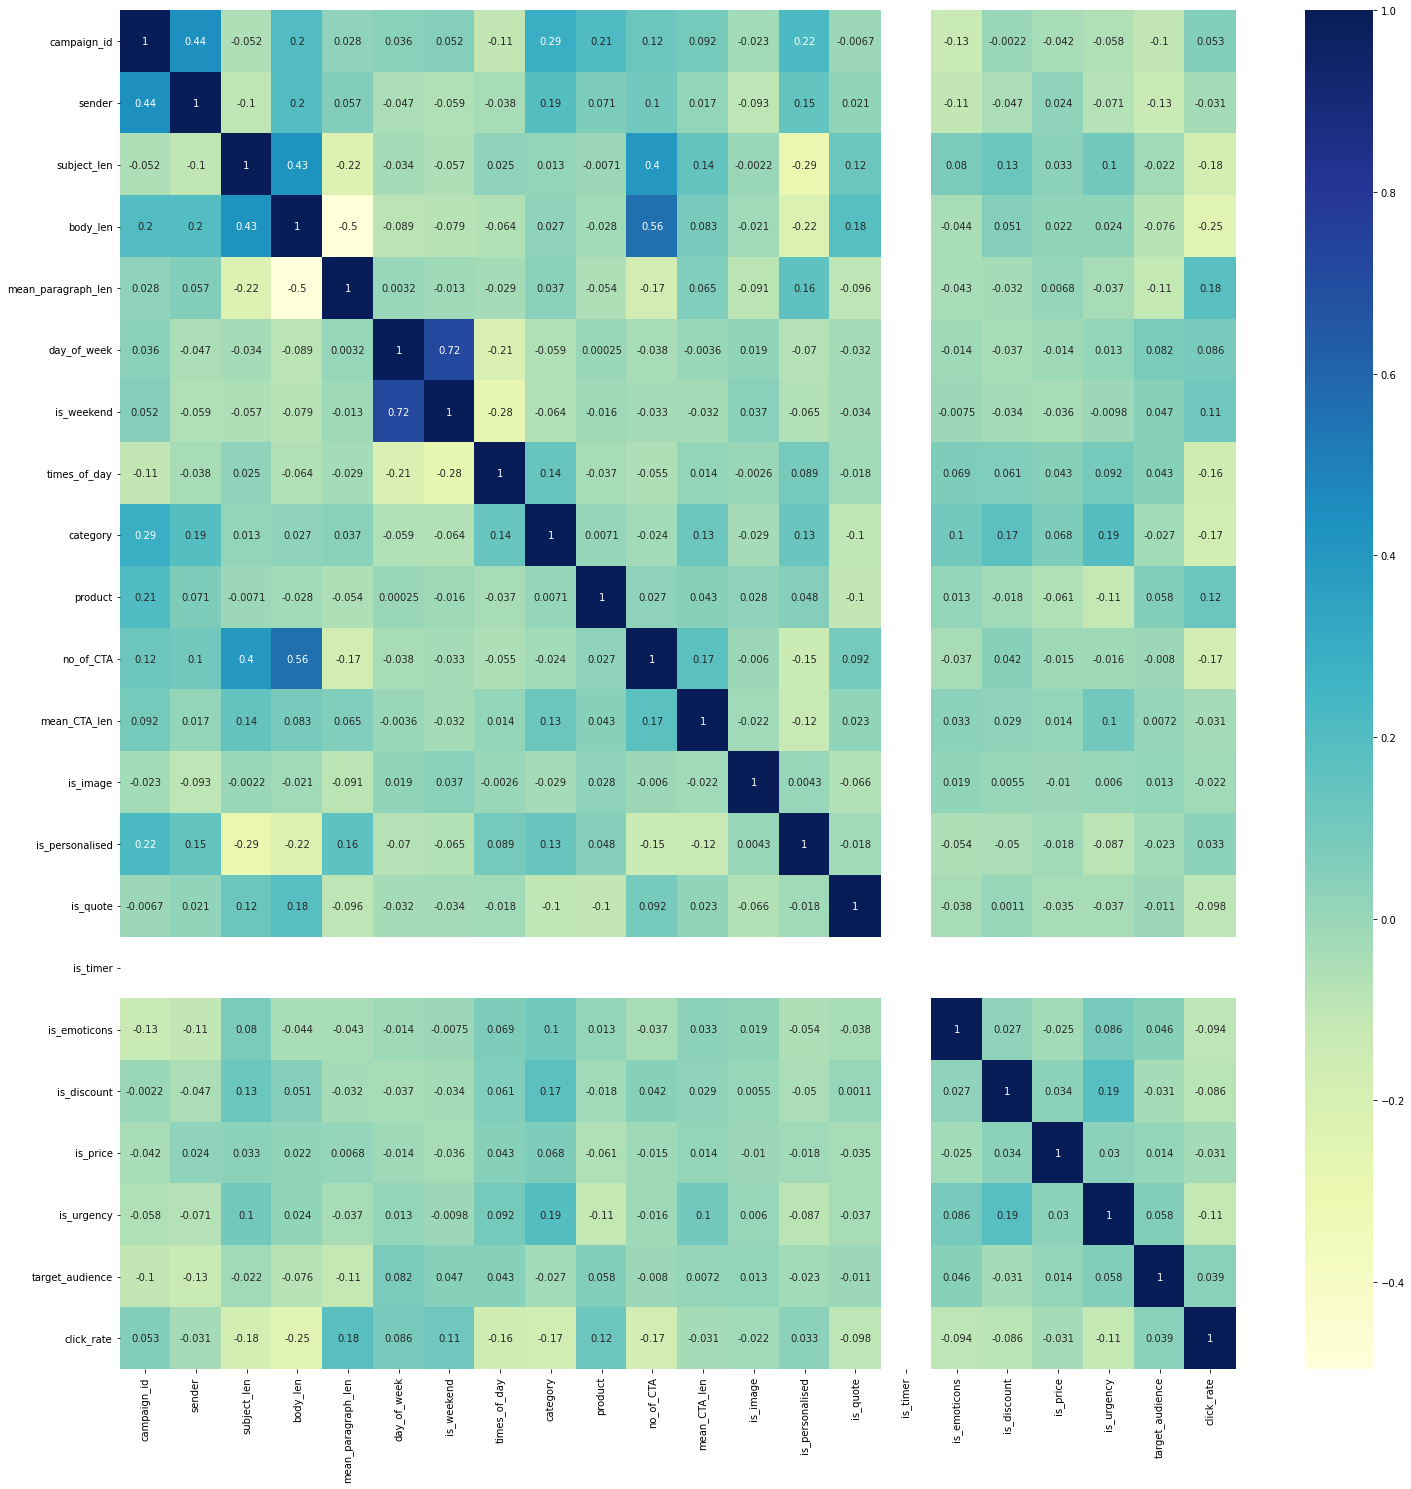

In [44]:
ax = plt.subplots(figsize=(25, 25))
sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)

In [45]:
# checking number of unique values in each column
train.nunique()

campaign_id           1888
sender                  12
subject_len            170
body_len              1568
mean_paragraph_len     121
day_of_week              7
is_weekend               2
times_of_day             3
category                16
product                 43
no_of_CTA               40
mean_CTA_len            79
is_image                 6
is_personalised          2
is_quote                 7
is_timer                 1
is_emoticons             6
is_discount              2
is_price                 8
is_urgency               2
target_audience         17
click_rate            1810
dtype: int64

In [46]:
# calc_vif(x)

# Test train Split

In [47]:
X = train.drop(['campaign_id','click_rate'],axis=1)

X.head()

sender  subject_len  body_len  mean_paragraph_len  day_of_week  is_weekend  \
0       3           76     10439                  39            5           1   
1       3           54      2570                 256            5           1   
2       3           59     12801                  16            5           1   
3       3           74     11037                  30            4           0   
4       3           80     10011                  27            5           1   

   times_of_day  category  product  no_of_CTA  mean_CTA_len  is_image  \
0             2         6       26          3            29         0   
1             1         2       11          0            22         0   
2             2         2       11          3            23         1   
3             3        15        9          4            24         0   
4             2         6       26          3            31         0   

   is_personalised  is_quote  is_timer  is_emoticons  is_discount  is_price  \
0                0         0         0             0            0         0   
1                0         0         0             0            0         0   
2                0         1         0             0            0         0   
3                0         0         0             0            0         0   
4                0         1         0             0            0         0   

   is_urgency  target_audience  
0           0               14  
1           0               10  
2           0               16  
3           0               10  
4           0               14

In [48]:
y = train['click_rate']

y.head()

0    0.103079
1    0.700000
2    0.002769
3    0.010868
4    0.142826
Name: click_rate, dtype: float64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [50]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [51]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

# Final Model - AdaBoostRegressor  with DecisionTreeRegressor as a base_estimator

In [52]:
from sklearn.ensemble import AdaBoostRegressor
ada_boost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=1.25,n_estimators=400, random_state=1)


# fitting data
ada_boost.fit(X_train,y_train)

#Predicting value
y_pred_ada = ada_boost.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred_ada)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

#cross validation score
cv_scores = cross_val_score(ada_boost, X_train, y_train, cv=5,scoring= 'r2')
cv_scores.mean()


MAE: 0.02434599292103183
MSE: 0.0015920989669838698
RMSE: 0.039901114858909265
R2 Score: 0.6401999103062741


0.47149978254139224

In [53]:
test = pd.read_csv('test_Bk2wfZ3.csv')
test.head()

campaign_id  sender  subject_len  body_len  mean_paragraph_len  \
0         1889       3           61     12871                  11   
1         1890       3           54      2569                 256   
2         1891       3           88      1473                  78   
3         1892       3           88      1473                  78   
4         1893       3           78      9020                  29   

   day_of_week  is_weekend times_of_day  category  product  no_of_CTA  \
0            6           1         Noon         6       26          3   
1            5           1      Morning         2       11          0   
2            4           0      Evening         2       11          0   
3            3           0      Evening         2       11          0   
4            3           0         Noon         6       26          2   

   mean_CTA_len  is_image  is_personalised  is_quote  is_timer  is_emoticons  \
0            37         1                0         0         0             1   
1            22         0                0         0         0             0   
2            22         1                0         1         0             0   
3            22         1                0         1         0             0   
4            40         0                0         0         0             0   

   is_discount  is_price  is_urgency  target_audience  
0            0         0           0               14  
1            0         0           0               10  
2            0         0           0               10  
3            0         0           0               10  
4            0         0           0               14

In [54]:
test['times_of_day'] = test['times_of_day'].map({'Morning': 1,'Noon': '2', 'Evening': '3'})

test['times_of_day'] = test['times_of_day'].astype(int)

test = test.drop(['campaign_id'],axis=1)

In [55]:
test.head()

sender  subject_len  body_len  mean_paragraph_len  day_of_week  is_weekend  \
0       3           61     12871                  11            6           1   
1       3           54      2569                 256            5           1   
2       3           88      1473                  78            4           0   
3       3           88      1473                  78            3           0   
4       3           78      9020                  29            3           0   

   times_of_day  category  product  no_of_CTA  mean_CTA_len  is_image  \
0             2         6       26          3            37         1   
1             1         2       11          0            22         0   
2             3         2       11          0            22         1   
3             3         2       11          0            22         1   
4             2         6       26          2            40         0   

   is_personalised  is_quote  is_timer  is_emoticons  is_discount  is_price  \
0                0         0         0             1            0         0   
1                0         0         0             0            0         0   
2                0         1         0             0            0         0   
3                0         1         0             0            0         0   
4                0         0         0             0            0         0   

   is_urgency  target_audience  
0           0               14  
1           0               10  
2           0               10  
3           0               10  
4           0               14

In [56]:
y_pred = ada_boost.predict(test)

In [57]:
2+2

4

In [58]:
y_pred[:5]

array([0.04735667, 0.7       , 0.12857143, 0.12857143, 0.12282561])

In [59]:
df = pd.DataFrame(y_pred,columns=['click_rate'])
df.head()

click_rate
0    0.047357
1    0.700000
2    0.128571
3    0.128571
4    0.122826

In [60]:
# sol=pd.read_csv('sample_submission_LJ2N3ZQ.csv')
# sol.head()

In [61]:
# sol['click_rate']=df['click_rate']
# sol.head()

In [62]:
# sol.to_csv('./submission.csv',index=False)